# Checkpoint 1

**Jialeng Ni**

- **Major**: Computer Science
- **unique name**: jialeng

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [143]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [144]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [145]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [146]:
# In that case, we will drop all the rows where the 8th grading Math score is missing
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [147]:
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

In [148]:
df["ENROLL_ALL"] = df["ENROLL_ALL"].fillna(df["ENROLL_ALL_EST"])
# we find that we can fill enroll_all with enroll_all_est

In [149]:
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

In [150]:
df.dropna(subset = ["ENROLL_ALL","TOTAL_REVENUE"],inplace = True);

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [151]:
df["YEAR"].nunique()
# We have 11 different years of data after data cleaning

9

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [152]:
df[(df["STATE"] == "MICHIGAN")|(df["STATE"] == "OHIO")][["STATE","AVG_MATH_8_SCORE"]].groupby("STATE").mean()

,AVG_MATH_8_SCORE
STATE,
MICHIGAN,276.666667
OHIO,283.222222


Find the average for your outcome score across all states in 2019

In [153]:
df[df["YEAR"] == 2019]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [154]:
df[["STATE","AVG_MATH_8_SCORE"]].groupby("STATE").agg("max").sort_values(by = "AVG_MATH_8_SCORE",ascending= False)

,AVG_MATH_8_SCORE
STATE,
MASSACHUSETTS,301.0
NEW_HAMPSHIRE,296.0
NEW_JERSEY,296.0
MINNESOTA,295.0
VERMONT,295.0
NORTH_DAKOTA,293.0
MONTANA,293.0
COLORADO,292.0
SOUTH_DAKOTA,291.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [155]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

In [156]:
df["TOTAL_REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE"]/ df['ENROLL_ALL']

Feature engineering justification:

- add a new column called supported services expenditure per students
- add a new column called total revenue per students

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '8th Grade Math Score Over Time')

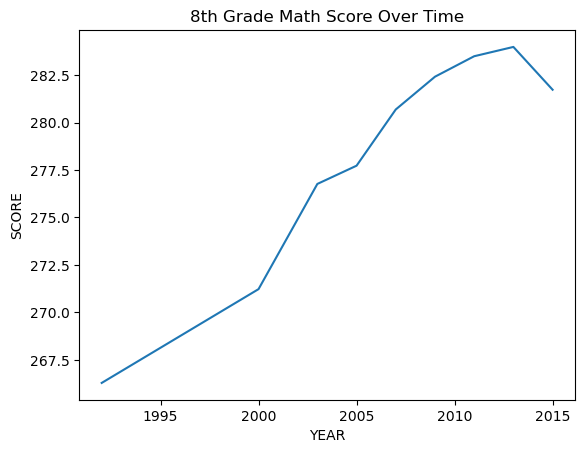

In [157]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

**8th Grade Math Score Over Time**

**Visualization 2**

Text(0.5, 1.0, '8th Grade Math Score Over 4th Math Score')

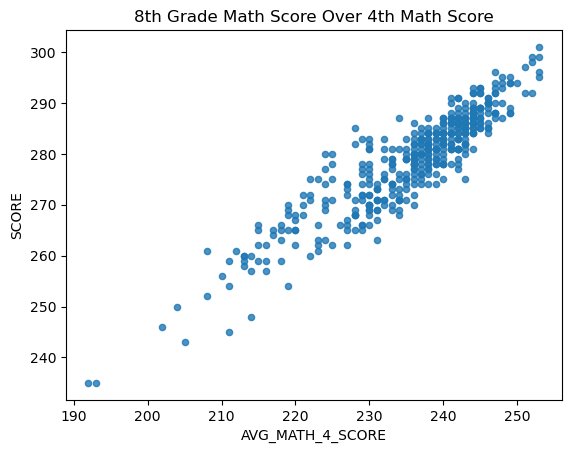

In [158]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over 4th Math Score')

**8th Grade Math Score Over 4th Math Score**

**Visualization 3**

Text(0.5, 1.0, '8th Grade Math Score Over 8th Reading Score')

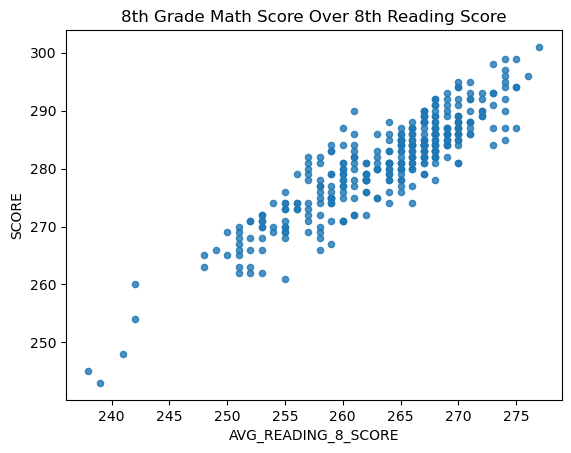

In [159]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over 8th Reading Score')

**Visualization 4**

Text(0.5, 1.0, '8th Grade Math Score Over 4th READING Score')

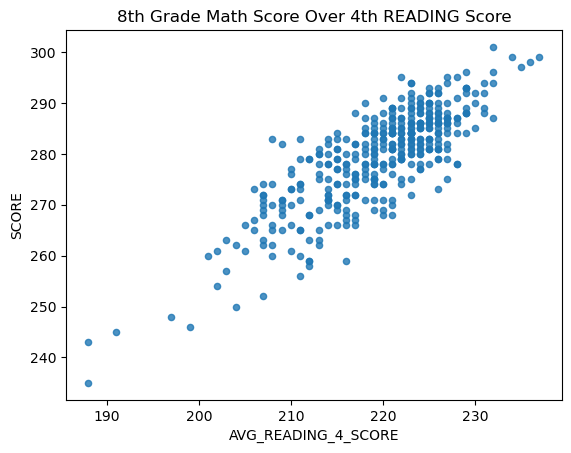

In [160]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over 4th READING Score')

**Visualization 5**

Text(0.5, 1.0, '8th Grade Math Score Over 4th READING Score')

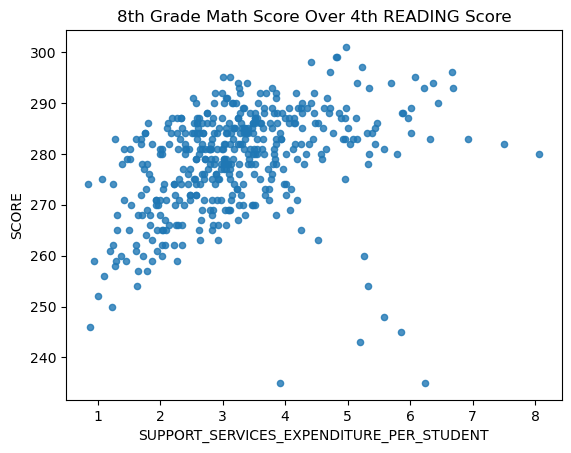

In [161]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over 4th READING Score')

**Visualization 6**

Text(0.5, 1.0, '8th Grade Math Score Over total revenue per student')

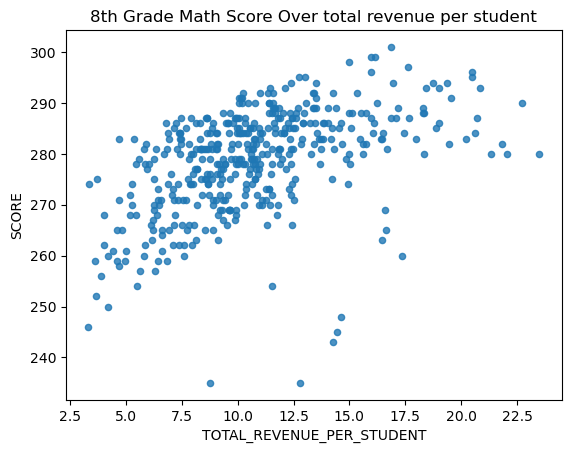

In [162]:
df.plot.scatter(x='TOTAL_REVENUE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over total revenue per student')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [167]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
       'TOTAL_REVENUE_PER_STUDENT'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

In [170]:
X = df[["TOTAL_REVENUE_PER_STUDENT","SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT","AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [171]:
y.fillna(y.median(),inplace = True)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size= 0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [212]:
# import your sklearn class here
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [213]:
# create your model here
model =linear_model.Lasso(alpha=0.05)
# model = RandomForestRegressor(max_depth=10, random_state=0);

In [214]:
model.fit(X_train, y_train)

Lasso(alpha=0.05)

In [215]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [216]:
# print(model.intercept_)
# print(model.coef_)

In [217]:
model.score(X_test, y_test)

0.9338565559812375

In [218]:
X_train

,TOTAL_REVENUE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
887,15.497106,4.695917,244.0,226.0,267.0
1174,22.049005,8.068185,236.0,213.0,260.0
879,7.898230,2.338818,241.0,221.0,265.0
1204,11.289004,3.742405,231.0,207.0,253.0
580,10.701515,2.816383,238.0,224.0,268.0
...,...,...,...,...,...
683,11.518591,3.411871,238.0,220.0,261.0
769,11.431744,3.256134,230.0,209.0,251.0
1086,12.488657,3.476756,246.0,224.0,269.0
1215,9.444256,2.858968,241.0,219.0,265.0


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

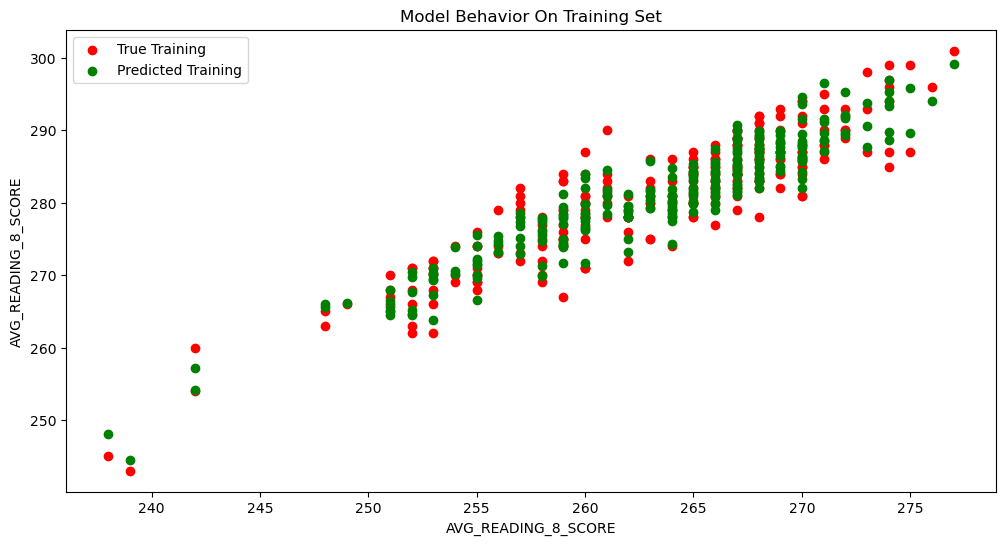

In [219]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

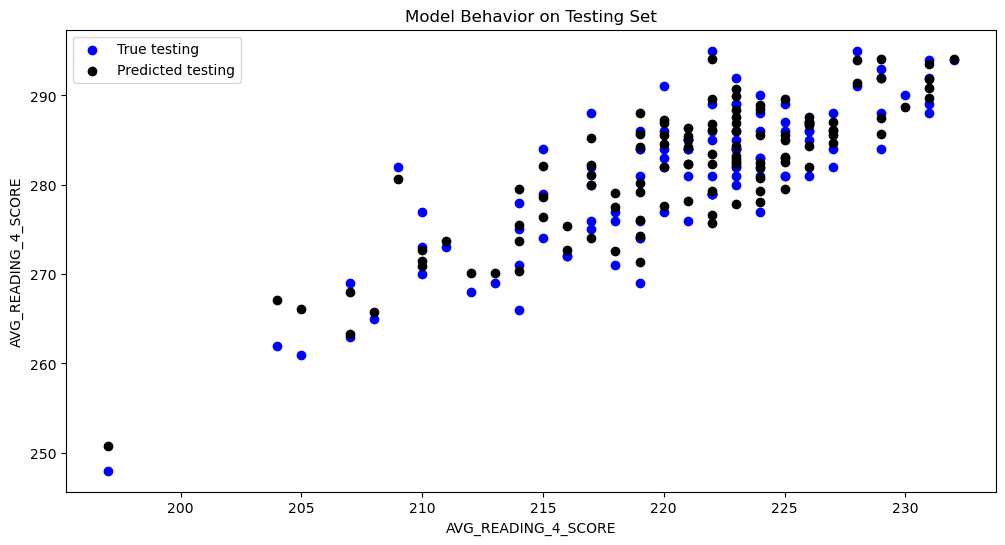

In [220]:
col_name = "AVG_READING_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")

In [221]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.0678985172821753

<h2> Summary </h2>

In the initial phase of our project, we conducted rigorous data preprocessing, encompassing tasks such as addressing missing values through mean imputation and judiciously removing outliers from our dataset. Subsequently, we embarked on a comprehensive exploratory data analysis, which helped us identify the most influential features related to our target variable. Through diligent feature engineering, we carefully curated the selection of variables that held significant relevance to our final predictions. Ultimately, our machine learning model of choice was the Lasso linear regression, with a regularization parameter (alpha) set to 0.05. Impressively, our model yielded a robust performance, showcasing an R-squared (R^2) score of 2.06, indicating its capability to explain a substantial portion of the variance within the data, thus underlining its effectiveness in predictive modeling.